In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
start_date = datetime(2006, 1, 1)
end_date = datetime(2023, 5, 1)


data = yf.download('^NSEI', start = start_date,
                   end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,0.011404
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,0.040130
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,0.003207
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,0.018780
...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.006749
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.001456
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.002493


In [ ]:
data.dropna(inplace = True)
data['Volatility of Returns'] = data['Returns'].rolling(20).std()
# data['Volatility of Log Returns'] = data['Log Returns'].rolling(20).std()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility of Returns
Date,,,,,,,,
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5668.049805,0,-0.000415,0.018166
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0,-0.019373,0.019442
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5351.000000,0,-0.038189,0.020899
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5215.299805,0,-0.025687,0.022079
2007-10-22,5202.750000,5247.399902,5070.899902,5184.000000,5184.000000,0,-0.006020,0.021942
...,...,...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.006749,0.005650
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.001456,0.005648
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.002493,0.005460


<Axes: xlabel='Returns', ylabel='Density'>

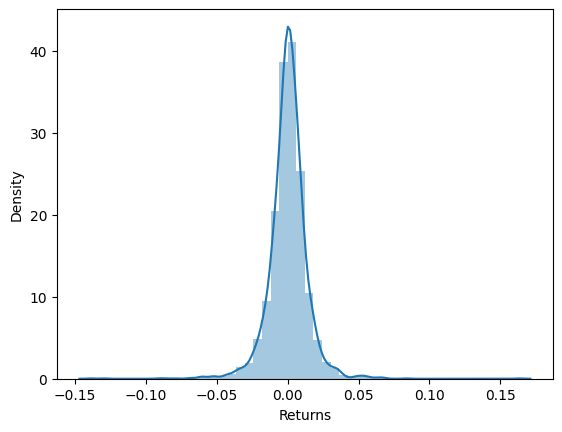

In [ ]:
sns.distplot(data['Returns'])

<Axes: xlabel='Date'>

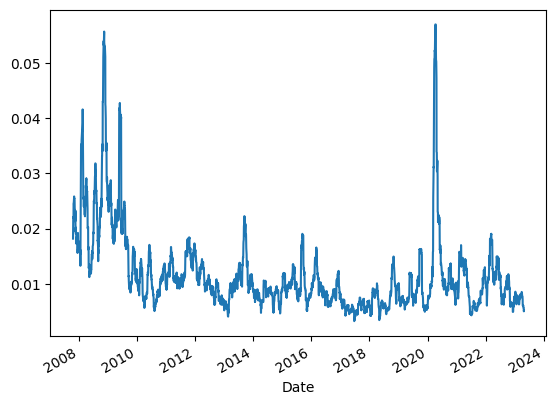

In [ ]:
data['Volatility of Returns'].plot()
# plt.hlines(data['Volatility of Returns'].mean(), xmin = data.index[0] , xmax = data.index[-1] , color = 'black')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:

result_stationarity = adfuller(data['Volatility of Returns'])
result_stationarity

(-5.088920852012619,
 1.4756233946336574e-05,
 29,
 3776,
 {'1%': -3.4320829849088885,
  '5%': -2.8623057373147742,
  '10%': -2.567177612264009},
 -42724.078458654374)

<Axes: xlabel='Volatility of Returns', ylabel='Density'>

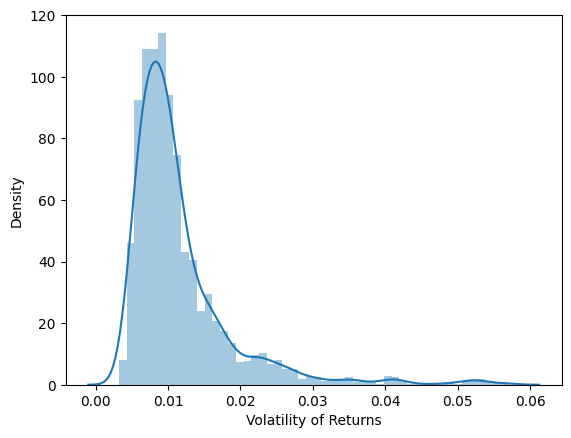

In [ ]:
sns.distplot(data['Volatility of Returns'])

In [ ]:
from scipy.stats import shapiro

In [ ]:
result_normal = shapiro(data['Volatility of Returns'])
result_normal

ShapiroResult(statistic=0.7244554758071899, pvalue=0.0)

In [ ]:
from scipy.stats import norm , invgauss , lognorm
from tqdm import tqdm
from sklearn.cluster import KMeans

In [ ]:
class HMM:

  def __init__(self , num_states):

    self.num_states = num_states

    self.initial_prob = np.ones(num_states) / num_states
    self.transition_matrix = np.ones((num_states , num_states)) / num_states
    self.dx = 0.0005
    self.emission_prob = [None] * self.num_states


  def normal(self , point , mean, std , d):

    return 1/(np.sqrt(2*np.pi) * std) * (np.exp(-((point - mean) **2) / (2*std**2))) / np.sum(1/(np.sqrt(2*np.pi) * std) * (np.exp(-((d - mean) **2) / (2*std**2))))


  def lognormal(self, point , mean , std):

    prob = lognorm.pdf(point , s = std , scale = mean)
    prob = np.sum(lognorm.pdf(np.arange(point - self.dx , point + self.dx) , s = std , scale = mean))
    return prob

  def initialization(self, d):

    kmeans = KMeans(self.num_states)

    clusters = kmeans.fit_predict(np.array(d).reshape(-1,1))

    means = kmeans.cluster_centers_

    std = []

    for i in range(self.num_states):

      cluster_d = []

      for j in range(len(d)):

        if clusters[j] == i:
          cluster_d.append(d[j])

      std.append(np.array(cluster_d).std())

    prior_prob = np.array([0.5] * self.num_states)

    for iter in tqdm(range(100)):

      d_prob = np.zeros((len(d) , self.num_states))
      for i in range(self.num_states):

        for j in range(len(d)):

          d_prob[j][i] = norm.pdf(d[j] , means[i] , std[i])

      cluster_prob = np.zeros((self.num_states , len(d)))

      for i in range(self.num_states):

        for j in range(len(d)):

          cluster_prob[i][j] = d_prob[j][i] * prior_prob[i] / np.sum(d_prob[j] * prior_prob)

      for i in range(self.num_states):
        prior_prob[i] = cluster_prob[i].sum() / len(d)

      new_mean = [0] * self.num_states
      new_std = [0] * self.num_states
      param_change_mean = [0] * self.num_states
      param_change_std = [0] * self.num_states
      for i in range(self.num_states):


        new_mean[i] = np.sum(cluster_prob[i] * (d)) / cluster_prob[i].sum()

        new_std[i] =np.sqrt( np.sum(cluster_prob[i] * ((d - new_mean[i]) ** 2)) / cluster_prob[i].sum())

        param_change_mean[i] = new_mean[i] - means[i]

        param_change_std[i] = new_std[i] - std[i]
        means[i] = new_mean[i]
        std[i] = new_std[i]

    for i in range(self.num_states):

      self.emission_prob[i] = norm(loc = means[i] , scale = std[i])


  def forward(self , d):

    # Forward matrix ---> [state , time]
    forward_matrix = np.zeros((len(d) , self.num_states))

    # Base Case
    for state in range(self.num_states):
      forward_matrix[0][state] = np.log(self.initial_prob[state] + 1e-10) + np.log(self.emission_prob[state].pdf(d[0]) + 1e-10)

    for time in range(1 , len(d)):

      for state in range(self.num_states):

        log_sum = []

        for state_prime in range(self.num_states):

          transition_prob = self.transition_matrix[state_prime][state]
          if transition_prob <= 0:
            transition_prob = 1e-10

          log_prob = forward_matrix[time - 1][state_prime] + np.log(transition_prob + 1e-10)
          log_sum.append(log_prob)

        max_log_prob = np.array(log_sum).max()
        forward_matrix[time][state] = max_log_prob + np.logaddexp.reduce(np.array(log_sum) - max_log_prob) + np.log(self.emission_prob[state].pdf(d[time]) + 1e-10)

    return forward_matrix

  def backward(self , d):

    # Backward Matrix ---> [state , time]
    backward_matrix = np.zeros((len(d) , self.num_states))

    # Base Case

    for state in range(self.num_states):

      backward_matrix[len(d) - 1][state] = np.log(1)

    # print(backward_matrix[len(d) - 1])

    for time in range(len(d) - 2 , -1 , -1):

      for state in range(self.num_states):

        log_sum = []

        for state_prime in range(self.num_states):

          transition_prob = self.transition_matrix[state][state_prime]
          if transition_prob <= 0:
            transition_prob = 1e-10
          log_prob = np.log(transition_prob + 1e-10) + np.log(self.emission_prob[state].pdf(d[time+1]) + 1e-10) + (backward_matrix[time+1][state_prime])

          log_sum.append(log_prob)

        max_log_prob = np.array(log_sum).max()
        backward_matrix[time][state] = max_log_prob + np.logaddexp.reduce(np.array(log_sum) - max_log_prob)

        # backward_matrix[time][state] = np.sum([self.transition_matrix[state_prime][state] * self.emission_prob[state_prime].pdf(d[time + 1]) * backward_matrix[time+1][state_prime] for state_prime in range(self.num_states)])
        # print(backward_matrix[time][state])

    # print(backward_matrix[3][1])
    return backward_matrix

  def fit(self, d , num_iterations):

    self.initialization(d)

    for iter in tqdm(range(num_iterations)):
      forward_matrix = self.forward(d)


      backward_matrix = self.backward(d)

      # Expected Step

      eta = np.zeros((len(d) , self.num_states , self.num_states))

      gamma = np.zeros((len(d) , self.num_states))

      for time in (range(len(d) - 1)):

        for state_1 in range(self.num_states):

          for state_2 in range(self.num_states):

            eta[time][state_1][state_2] = forward_matrix[time][state_1] + np.log(self.transition_matrix[state_1][state_2] + 1e-10) + np.log(self.emission_prob[state_2].pdf(d[time+1])+ 1e-10) + backward_matrix[time+1][state_2]

        log_sum_eta = np.logaddexp.reduce(eta[time].flatten())
        eta[time] = np.exp(eta[time] - log_sum_eta)  # Normalize
        # print(eta[time])
      for time in range(len(d) - 1):

        # print(np.log(np.exp(np.array(forward_matrix[time]) + np.array(backward_matrix[time])).sum()))

        log_sum = []

        for state_1 in range(self.num_states):


          gamma[time][state_1] = forward_matrix[time][state_1] + backward_matrix[time][state_1]
          log_sum.append(gamma[time][state_1])
            # gamma[time][state_1] -= np.log(np.exp(np.array(forward_matrix[time]) + np.array(backward_matrix[time])).sum())


        max_log_prob = np.array(log_sum).max()

        gamma[time] -= (max_log_prob + np.logaddexp.reduce(np.array(log_sum) - max_log_prob))
            # print(gamma[time][state_1])
        # gamma[time]

        gamma[time] = np.exp(gamma[time])
        # print(gamma[time])
      # Maximization Step

      # Updating the initial probability

      for state in range(self.num_states):

        self.initial_prob[state] = gamma[0][state]

      # Updating the transition matrix

      for state_1 in range(self.num_states):

        denominator = 0

        for time in range(len(d) - 1):
          denominator += gamma[time][state_1]

        for state_2 in range(self.num_states):

          value = 0

          for time in range(len(d) - 1):

            value += eta[time][state_1][state_2]

          self.transition_matrix[state_1][state_2] = value / denominator

      # Updating the emission distribution

      for state in range(self.num_states):

        sum_mean_num = 0
        sum_mean_deno = 0

        sum_std_num = 0
        sum_std_deno = 0

        for time in range(len(d)):

          sum_mean_num += gamma[time][state] * (d[time])
          sum_mean_deno += gamma[time][state]

        mean = sum_mean_num / sum_mean_deno

        for time in range(len(d)):

          sum_std_num += gamma[time][state] * ((d[time] - mean) ** 2)
          sum_std_deno += gamma[time][state]

        std = (sum_std_num / sum_std_deno) ** (1/2)


        self.emission_prob[state] = norm(loc = mean , scale = std)

  def viterbi(self , dp):

    # Initialization Delta --> [time , state]

    Delta = np.zeros((len(dp) , self.num_states))

    for state in range(self.num_states):
      Delta[0][state] = self.initial_prob[state] * self.emission_prob[state].pdf(dp[0])

    Prev_state = np.zeros((len(dp) , self.num_states) , dtype = int)

    for state in range(self.num_states):
      Prev_state[0][state] = -1

    # for time in range(1,len(dp)):

    #   for state_2 in range(self.num_states):

    #     max_transition = []

    #     for state_1 in range(self.num_states):
    #       # print(Delta[time-1][state_1] * self.transition_matrix[state_1][state_2])
    #       max_transition.append(Delta[time-1][state_1] * self.transition_matrix[state_1][state_2])

    #     Delta[time][state_2] = np.array(max_transition).max() * self.emission_prob[state_2].pdf(dp[time])
    #     # print(Delta[time][state_2])
    #     Prev_state[time][state_2] = np.array(max_transition).argmax()
    for time in range(1, len(dp)):
      for state_2 in range(self.num_states):
          max_transition = []

          for state_1 in range(self.num_states):
              transition_prob = self.transition_matrix[state_1][state_2]
              if transition_prob <= 0:
                  transition_prob = 1e-10  # Avoid zero probability

              log_prob = Delta[time - 1][state_1] + np.log(transition_prob)  # Sum in log space
              max_transition.append(log_prob)

          max_log_prob = np.array(max_transition).max()
          Delta[time][state_2] = max_log_prob + np.log(self.emission_prob[state_2].pdf(dp[time]) + 1e-10)
          Prev_state[time][state_2] = np.array(max_transition).argmax()

    # return Prev_state
    Sequence = []

    Final_state = np.array(Delta)[len(dp) - 1].argmax()

    Sequence.append(Final_state)
    # print(Final_state)

    for time in range(len(dp) - 2 , 0 , -1):
      # print(Prev_state[time][Sequence[-1]])
      Sequence.append(Prev_state[time][Sequence[-1]])


    Sequence = Sequence[::-1]

    return Sequence

  def predict(self ,last_state ,Data):

    forward_matrix = self.forward(Data)

    next_state = np.array(np.array(forward_matrix[len(Data) - 1]) * np.array(self.transition_matrix[last_state])).argmax()

    return next_state


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train , test = train_test_split((data['Volatility of Returns'] * 100).values  , test_size = 0.3 , shuffle = False)

In [ ]:
model = HMM(2)
model.fit(train , 50)

sequence = model.viterbi((data['Volatility of Returns'] * 100).values)

100%|██████████| 50/50 [03:41<00:00,  4.44s/it]


In [ ]:
model.emission_prob[0].stats()

(0.8300822304363512, 0.04414527217089171)

In [ ]:

model.emission_prob[1].stats()

(2.038734932254582, 0.7123232456271318)

In [ ]:
model.initial_prob

array([1.82765195e-22, 1.00000000e+00])

In [ ]:
model.transition_matrix

array([[0.99197636, 0.00833981],
       [0.01910926, 0.98018547]])

In [ ]:
pd.Series(sequence).value_counts()

0    2755
1    1050
dtype: int64

In [ ]:
sequence.insert(0 , -1)
data['Sequence'] = sequence

for i in range(len(data) - 1):

  if data['Sequence'][data.index[i]] != data['Sequence'][data.index[i+1]]:
    data.at[data.index[i] , 'Change Point'] = 1

  else:
    data.at[data.index[i] , 'Change Point'] = 0

Text(0.5, 1.0, 'Volatility vs Change Point')

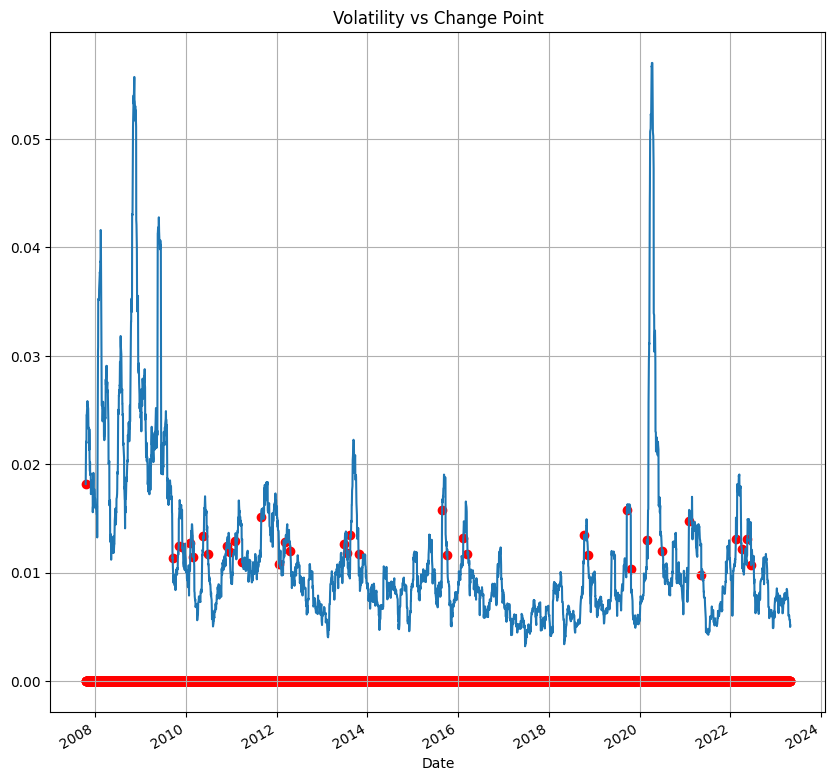

In [ ]:
fig = plt.figure(figsize = (10,10))
data['Volatility of Returns'].plot()
plt.scatter(x = data.index , y = data['Volatility of Returns'] * data['Change Point'] , color = 'Red')
plt.grid()
plt.title('Volatility vs Change Point')

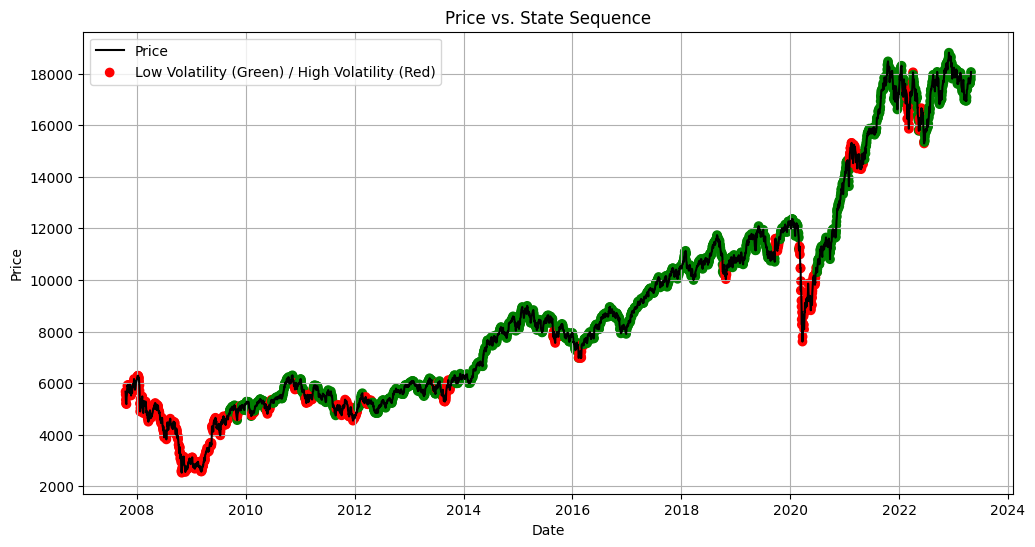

In [ ]:
prices = data['Adj Close']
state_sequence = data['Sequence']

# Create a list of colors based on the 'Sequence' values
colors = ['green' if state == 0 else 'red' for state in state_sequence]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the 'Adj Close' data as a line with colors based on the state
ax.plot(data.index, prices, color='black', label='Price')
ax.scatter(data.index, prices, c=colors, label='Low Volatility (Green) / High Volatility (Red)')

# Customize the plot (labels, titles, etc.)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price vs. State Sequence')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

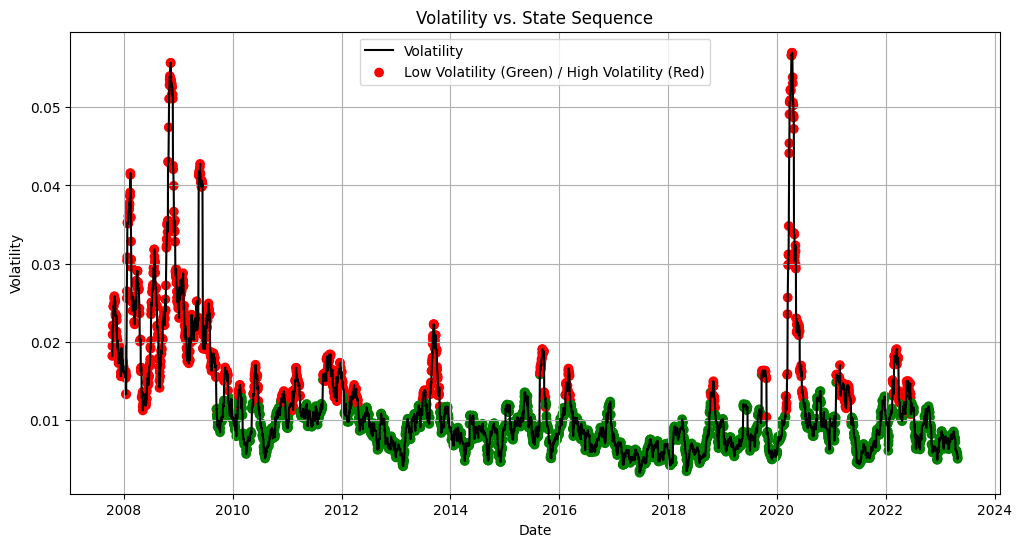

In [ ]:
prices = data['Volatility of Returns']
state_sequence = data['Sequence']

# Create a list of colors based on the 'Sequence' values
colors = ['green' if state == 0 else 'red' for state in state_sequence]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the 'Adj Close' data as a line with colors based on the state
ax.plot(data.index, prices, color='black', label='Volatility')
ax.scatter(data.index, prices, c=colors, label='Low Volatility (Green) / High Volatility (Red)')

# Customize the plot (labels, titles, etc.)
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('Volatility vs. State Sequence')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [ ]:
## Split the data
## then train the model on the data
## use the viterbi algorithm to get the most likely sequence

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train , test = train_test_split(data[['Volatility of Returns' , 'Sequence']].reset_index(drop = True) , test_size = 0.25 , shuffle = False)

In [ ]:
Reg0 = RandomForestRegressor()
Reg1 = RandomForestRegressor()

In [ ]:
train_0 = train[train['Sequence'] == 0]
train_1 = train[train['Sequence'] == 1]

In [ ]:
Reg0.fit(np.array(train_0['Volatility of Returns'].shift(1).dropna().values).reshape(-1,1) , train_0['Volatility of Returns'].iloc[1:].values)
Reg1.fit(np.array(train_1['Volatility of Returns'].shift(1).dropna().values).reshape(-1,1) , train_1['Volatility of Returns'].iloc[1:].values)

RandomForestRegressor()

In [ ]:
last_state = train['Sequence'].values[-1]
pred_test = []
for i in tqdm(range(len(test))):
  next_state = model.predict(last_state , train['Volatility of Returns'])

  if next_state == 0:

    prediction = Reg0.predict(np.array(train[train['Sequence'] == 0]['Volatility of Returns'].values[-1]).reshape(-1,1))

  else:
    prediction = Reg1.predict(np.array(train[train['Sequence'] == 1]['Volatility of Returns'].values[-1]).reshape(-1,1))


  train.loc[len(train)] = [prediction , next_state]

  last_state = next_state

100%|██████████| 952/952 [21:24<00:00,  1.35s/it]


In [ ]:
for i in range(2854 , len(train))

,Volatility of Returns,Sequence
2854,[0.01262331161958883],1
2855,[0.007517772160485128],0
2856,[0.01234318391751808],1
2857,[0.007652590758951118],0
2858,[0.013138104311457724],1
...,...,...
3801,[0.006933038094867517],0
3802,[0.014936711763651809],1
3803,[0.007139309115452424],0
3804,[0.01540094928774439],1


In [ ]:
train.loc[2854]['Volatility of Returns'][0]

0.01262331161958883

In [ ]:
pred = []
for i in range(2854 , len(train)):
  pred.append(train.loc[i]['Volatility of Returns'][0])

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
math.sqrt(mean_squared_error(test['Volatility of Returns'] , pred))

0.008464874832908243